# Propagação temporal de uma função de onda (método de Crank-Nicolson)

* PET - Física UFRN
* Petiano: Moisés da Rocha Alves
* Data: 09 de Junho de 2023

O objetivo deste `Notebook` é introduzirmos a propagação temporal de uma função de onda através da solução numérica da equação de Schrodinger dependente do tempo. Para isso, utilizaremos uma evolução unitária através do método de Crank-Nicolson [1].

Vale lembrar que este `Notebook` é uma revisitação a um `Notebook` anterior sobre o mesmo tema [2], feito por outro petiano. A razão de o revisitarmos é introduzir um método diferente do que foi utilizado anteriormente, assim como animar as evoluções temporais. Cabe também uma menção a referência [3], que serviu de inspiração para a criação deste `Notebook`.

Dito isto, vamos primeiro importar as bibliotecas que nos serão necessárias.

### Importando as bibliotecas necessárias

In [1]:
import numpy as np
import scipy.sparse as spa
from scipy.sparse.linalg import splu
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.integrate import simpson

Além disso, definiremos também alguns parâmetros que melhoram a qualidade geral dos plots do pacote `matplotlib.pyplot`. Esses parâmetros podem ser chamados através da função `opt_plot`.

In [2]:
def opt_plot():
    plt.minorticks_on()
    plt.tick_params(axis='both',which='minor', direction = "in",
                    top = True,right = True, length=5,width=1,
                    labelsize=15)
    plt.tick_params(axis='both',which='major', direction = "in",
                    top = True,right = True, length=8,width=1,
                    labelsize=15)

Agora, vamos ao conteúdo do `Notebook` propriamente dito.

## 1. A equação de Schrödinger e a evolução temporal

A equação de Schrödinger, que descreve uma evolução temporal de um estado $|\psi(t)\rangle$, pode ser enunciada da seguinte forma:

$$
i\hbar \frac{d}{dt}|\psi(t)\rangle = \mathcal{H}(t) |\psi (t)\rangle \tag{1.1}.
$$

Se o operador hamiltoniano $\mathcal{H}(t)$ for independente do tempo, podemos escrever a evolução temporal como:

$$
|\psi(t + \Delta t)\rangle = e^{-i\mathcal{H}\Delta t/\hbar} |\psi(t)\rangle \tag{1.2},
$$

onde o operador $U(\Delta t) = e^{-i\mathcal{H}\Delta t/\hbar}$ é um operador unitário (isto é, preservará a norma do estado).

Porém, estamos interessados no problema unidimensional. Para isso, é necessário que avaliemos nossa função no espaço da posição $x$. Assim, ao atuarmos $\langle{x}|$ na equação (1.1), ficamos com a seguinte equação:

$$
i \hbar \frac{\partial}{\partial t}\psi(x,t) = \mathcal{H} \psi (x,t) \tag{1.3},
$$

Note, no entanto, que podemos escrever a equação (1.3) expandindo o operador hamiltoniano na seguinte forma:

$$
\mathcal{H} = \mathcal{T}+\hat{V},
$$

que nos dá a equação de Schrodinger unidimensional dependente do tempo:
$$
i\hbar \frac{\partial}{\partial t}\psi(x,t) = -\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}\psi(x,t) + \hat{V}\psi(x,t)\tag{1.4}.
$$

Se considerarmos unidades onde $m = 1$ e $\hbar = 1$ (para fins de simplificação numérica), teremos que a equação (1.4) e a equação (1.2) (no espaço da posição) ficarão na seguinte forma:

$$
i\frac{\partial}{\partial t}\psi(x,t) = -\frac{1}{2}\frac{\partial^2}{\partial x^2}\psi(x,t) + \hat{V}\psi(x,t)\tag{1.5},
$$

$$
\psi(x, t + \Delta t) =  e^{-i\mathcal{H}\Delta t}\ \psi(x,t)\tag{1.6}.
$$

Agora, estamos aptos a abordar as equações acima numericamente.

## 2. O método de Crank-Nicolson

A partir da equação (1.6), uma abordagem natural seria considerarmos a definição da exponenciação de uma matriz e expandirmos em seus termos de primeira ordem para buscarmos uma evolução temporal numérica. Assim, ao exponenciarmos uma matriz $A$, teremos, por definição, que:

$$
e^{A} = \sum_{k=0}^{\infty}\frac{1}{k!}A^k \tag{2.1}.
$$

Portanto, ao denotarmos um passo temporal $n+1$ para um certo valor discretizado de $\psi(x,t+\Delta t)$ e um passo $n$ para um valor de $\psi(x,t)$, ficamos com a seguinte expansão em primeira ordem para uma evolução temporal (que é análoga a utilizar o método de Euler "para frente" ou explícito):

$$
\psi^{n+1} = e^{-i\mathcal{H}\Delta t}\ \psi^{n} \approx (\mathbb{1} - i\mathcal{H}\Delta t)\ \psi^{n} \tag{2.2}.
$$

Entretanto, repare que após fazermos esta aproximação teremos uma evolução que não é mais unitária, já que $(1 - i\mathcal{H}\Delta t)$ não é um resultado unitário.

Se evoluirmos pelo método de Euler "para trás" (ou implícitamente) teremos a seguinte forma:
$$
\psi^{n} = e^{i\mathcal{H}\Delta t}\ \psi^{n+1} \approx (\mathbb{1} + i\mathcal{H}\Delta t)\ \psi^{n} \tag{2.3}.
$$

Note que esta forma também nos trás o mesmo problema da não-unitariedade. Podemos, entretanto, combinar os métodos explícitos e implícitos através do método de Crank-Nicolson. Faremos a evolução da seguinte forma:
$$
\psi^{n+1} = e^{-i\mathcal{H}\Delta t}\ \psi^{n} = e^{-i\mathcal{H}\Delta t/2}e^{-i\mathcal{H}\Delta t/2}\ \psi^{n} = e^{-i\mathcal{H}\Delta t/2}(e^{i\mathcal{H}\Delta t/2})^{-1}\ \psi^{n}.
$$

Agora, utilizamos as aproximações feitas nas formas explícita e implícita (2.2 e 2.3) para obtermos o seguinte resultado:

$$
\psi^{n+1} \approx (\mathbb{1} - i\mathcal{H}\Delta t/2)(\mathbb{1} + i\mathcal{H}\Delta t/2)^{-1}\ \psi^{n}. \tag{2.4}
$$

Note agora que o operador de evolução temporal que obtemos é unitário, já que, se $U = (\mathbb{1} - i\mathcal{H}\Delta t/2)(\mathbb{1} + i\mathcal{H}\Delta t/2)^{-1}$, então:

$$
U^{\dagger} = (\mathbb{1} + i\mathcal{H}\Delta t/2)(\mathbb{1} - i\mathcal{H}\Delta t/2)^{-1},
$$

e, portanto:

$$
UU^{\dagger} = \mathbb{1}.
$$

Assim, teremos uma evolução do tipo:

$$
\psi^{n+1} \approx U(\Delta t)\ \psi^{n} \tag{2.5},
$$

que preserva a norma ao longo de toda a evolução temporal que faremos.

Por fim, é importante notarmos que podemos escrever a evolução na forma:

$$
(\mathbb{1} + i\mathcal{H}\Delta t/2)\ \psi^{n+1} \approx (\mathbb{1} - i\mathcal{H}\Delta t/2)\ \psi^{n} \tag{2.6},
$$

onde ficamos com uma equação matricial do tipo $Ax = b$ que pode ser determinada através de métodos como a decomposição LU. Para este fim, utilizaremos o pacote `scipy.sparse` e o pacote `scipy.sparse.linalg`.

Agora, nos resta um problema: como descrever $\mathcal{H}$?

## 3. Discretizando a equação de Schrödinger

Durante a descrição feita ao longo de toda a seção 2 utilizamos somente a evolução unitária para tratarmos nosso problema. Agora, utilizaremos a equação de Schrödinger descrita na equação (1.5) de maneira discretizada para descrevermos nosso operador hamiltoniano numa forma matricial. Para discretizar a parte temporal, basta que façamos:

$$
\frac{\partial}{\partial t} \psi(x_j,t_n) = \frac{\psi^{n+1}_{j} -\psi^{n}_{j}}{\Delta t} \tag{3.1},
$$

onde o índice $j$ representa uma discretização espacial e o índice $n$ representa a discretização temporal. O termo $\Delta t$ determinará o tamanho do passo temporal.

Para a parte espacial, podemos usar diferenças finitas centradas em sua aproximação de segunda ordem:
$$
\frac{\partial^2}{\partial x^2} \psi(x_j,t_n) = \frac{\psi^{n}_{j+1} + \psi^{n}_{j-1} - 2\psi^{n}_{j}}{(\Delta x)^2} \tag{3.2},
$$

onde o termo $\Delta x$ determinará o tamanho do passo espacial.

Mas como isso ajuda em descrever $\mathcal{H}$? 

Para entender essa questão, consideremos as funções de onda $\Psi$ em um tempo $t_{n+1}$ e $t_{n}$ como vetores coluna, onde cada componente da coluna é uma discretização no espaço definido dentro do intervalo $[0, J]$, onde $J + 1$ representa o tamanho da discretização no espaço (tamanho do grid). Assim, ficamos tal que:

$$
\Psi^{n} = 
\begin{bmatrix}
\psi^{n}_0 & \psi^{n}_1 & \psi^{n}_2 & \ldots & \psi^{n}_{J}\\
\end{bmatrix}^T \tag{3.3}.
$$

$$
\Psi^{n+1} = 
\begin{bmatrix}
\psi^{n+1}_0 & \psi^{n+1}_1 & \psi^{n+1}_2 & \ldots & \psi^{n+1}_{J}\\
\end{bmatrix}^T \tag{3.4}.
$$

Ao compactarmos toda a informação espacial das funções de onda desta maneira, podemos notar, através da equação (3.2), que o operador $\mathcal{T}$ pode ser escrito como uma matriz tridiagonal tal que:

$$
\mathcal{T} = -\frac{1}{2}\frac{\partial^2}{\partial x^2} = -\frac{1}{2\Delta x^2}
\begin{bmatrix}
-2 & 1 & 0 & 0 & \ldots & 0 & 0 & 0\\
1 & -2 & 1 & 0 & \ldots & 0 & 0 & 0\\
0 & 1 & -2 & 1 & \ldots & 0 & 0 & 0\\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots\\
0 & 0 & 0 & 0 & \ldots & 1 & -2 & 1\\
0 & 0 & 0 & 0 & \ldots & 0 & 1 & -2\\
\end{bmatrix} \tag{3.5}.
$$

Já o operador $\hat{V}$ poderá ser escrito como uma matriz diagonal tal que:

$$
\hat{V} = diag
\begin{bmatrix}
v_0 & v_1 & v_2 & \ldots & v_{J}\\
\end{bmatrix} \tag{3.6}.
$$

Note que assim que escrevemos os operadores desta maneira, colocamos condições de contorno implícitas na equação tais que:

$$
\psi(x = L_1,t) = \psi(x = L_2, t) = 0.
$$
Ou seja, estamos assumindo que o potencial nas bordas é infinito, resultando em um poço de potencial infinito definido no intervalo $[L_1, L_2]$.

Dito isto, ao obtermos uma forma de representar $\mathcal{H}$, conforme o método descrito na seção 2, podemos reescrever a equação (2.6) da seguinte forma:

$$
U_2\ \Psi^{n+1} = U_1\ \Psi^{n} \tag{3.7},
$$

onde:

$$
U_2 = \mathbb{1} + \frac{i\Delta t}{2} \ (\mathcal{T}+\hat{V}),
$$

$$
U_1 = \mathbb{1} - \frac{i\Delta t}{2} \ (\mathcal{T}+\hat{V}).
$$

Agora, é possível resolvermos nosso problema de maneira númerica ao especificarmos uma certa função de onda inicial $\psi(x,t = 0)$ e um potencial $\hat{V}$.

## 4. Resolvendo o problema numericamente

Como dito anteriormente, devemos especificar uma certa função de onda inicial. Para o nosso problema, considere um pacote gaussiano centrado em $x_0$ e com um momento médio $k_0$ que é dado por:

$$
\psi(x,t = 0) =
  \dfrac{1}{\sqrt[4]{2\pi\sigma_x^2}}
  \cdot
  e^{i\cdot k_0(x - x_0)}
  \cdot
  e^{-\frac{(x - x_0)^2}{4\sigma_x^2}}, \tag{3.8}
$$

Assim, como devemos transcrever nosso resultado para a matriz coluna que foi proposta, em código é cômodo definirmos uma função que retorne com os valores desejados do pacote gaussiano conforme os parâmetros inseridos nesta função.

In [3]:
def gaussian_wavepacket(x, x0, k, sigma = 0.1):
    x = np.asarray(x)
    g = np.sqrt(1/(np.sqrt(2*np.pi)*sigma)) * np.exp(-(x - x0)**2/(4*sigma**2))
    return np.exp(1j * k*(x-x0)) * g

Agora, precisamos definir nossos grids espaciais e temporais. Em código, utilizando o pacote do `numpy`, pode ser feito da maneira a seguir.

In [4]:
L = 20
Nx = 200
x_points = np.linspace(-L,L,Nx)
dx = x_points[1] - x_points[0]

Lt = 500
Nt = 300
t_points = np.linspace(0, Lt, Nt)
dt = t_points[1] - t_points[0]

Note que definimos um poço simétrico de potencial infinito com parâmetro $L = 10$.

Agora, precisamos descrever as matrizes de $\mathcal{T}$ e $\hat{V}$ utilizando os pacotes de álgebra linear importados. Foi feito da seguinte maneira:

In [5]:
O = np.ones((Nx))
Z = np.zeros((Nx))
tridiagonal = spa.spdiags([O, -2*O, O], [-1, 0, 1], Nx, Nx)
T = -1/(2*dx)*tridiagonal
V = spa.spdiags([Z], [0], Nx, Nx)

É necessário, agora, descrever as matrizes $U_1$ e $U_2$ através dos valores de $\mathcal{T}$ e $\hat{V}$. Faremos, depois disso, a decomposição LU de $U_2$. A usaremos para computar os valores da solução de $\Psi^{n+1}$.

In [6]:
U2 = spa.eye(Nx) + (1j * 0.5 * dt) * (T + V)
U1 = spa.eye(Nx) - (1j * 0.5 * dt) * (T + V)
U2 = U2.tocsc()
LU = splu(U2)

Por último, e não menos importante, definimos a função de onda inicial através da função que definimos para um pacote gaussiano lá em cima. Utilizaremos $x_0 = 0$, $k_0 = 0$ e $\sigma_x = 1$.

In [7]:
psi = np.zeros((Nx, Nt), dtype=complex)
psi[:, 0] = gaussian_wavepacket(x_points, 0, 0, 1)

Agora, resta só evoluirmos nossa função de onda no tempo:

In [8]:
for tt in range(Nt-1):
    b = U1.dot(psi[:,tt])
    psi[:,tt+1] = LU.solve(b)

Note que o array `psi` contém todos os valores de $\psi(x,t)$ ao longo da posição e do tempo. Os utilizaremos para fazer uma animação. Para este fim, utilizaremos o pacote `matplotlib.animation`.

Ainda, por meio do método de Simpson para calcular integrais numéricas, que pode ser chamado através da função `simpson` do pacote `scipy.integrate`, calculamos o desvio padrão e o valor médio da posição do pacote para cada passo da evolução. Também checaremos o fator de normalização da função de onda, que deve ser sempre igual a 1 se a evolução temporal é de fato unitária.

MovieWriter ffmpeg unavailable; using Pillow instead.


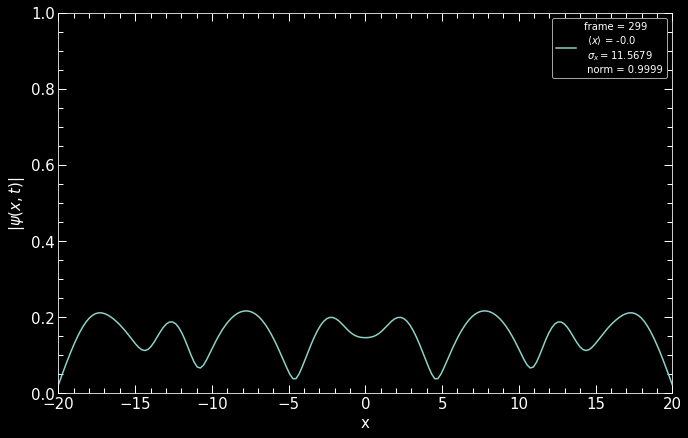

In [9]:
# Inicialização do gráfico em animação
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(11,7))
plt_data, = ax.plot([], [], label=' ')
opt_plot()
ax.set_ylim(0,1)
ax.set_xlim(-20, 20)
ax.set_xlabel("x", fontsize = 15)
ax.set_ylabel("$|\psi(x,t)|$", fontsize = 15)
T = plt.legend(loc=1)

# Função que atualiza a animação a cada frame t
def wave_plot(t):
    # Atualização dos parâmetros no gráfico
    x_mean_value = simpson(x_points*np.abs(psi[:,t-1])**2, x_points)
    x_squared_mean_value = simpson(x_points**2*np.abs(psi[:,t-1])**2, x_points)
    deviation = np.sqrt(x_squared_mean_value - x_mean_value**2)
    norm_factor = simpson(np.abs(psi[:,t-1])**2, x_points)
    lab = ('frame = ' + str(t) 
            + '\n $\langle x \\rangle$ = ' + str(round(x_mean_value, 4)) 
            + "\n $\sigma _x = $" + str(round(deviation, 4)) 
            + "\n norm = " + str(round(norm_factor, 4)))
    T.get_texts()[0].set_text(lab)

    # Plots do gráfico da função de onda
    y_points = np.abs(psi[:,t-1])
    plt_data.set_data(x_points, y_points)
    return plt_data,

ani = animation.FuncAnimation(fig, wave_plot, range(0, Nt), interval=1, blit=False, repeat=False)
ani.save('wave.gif')

Após a função ser chamada, o Jupyter plota apenas o estado final da animação. Já que o Jupyter não é compatível com esse tipo de animação, salvamos a animação em um .gif para que possamos visualizar o resultado final. Assim:

![.gif da evolução no tempo da função de onda](../Imagens/Propaga%C3%A7%C3%A3o%20temporal%20de%20uma%20fun%C3%A7%C3%A3o%20de%20onda%20(m%C3%A9todo%20de%20Crank-Nicolson)/wave.gif)

Conforme previsto pela mecânica quântica, o pacote deve evoluir de maneira que o $\sigma _x$ aumente com o tempo, onde é possível verificar o mesmo comportamento ocorrendo neste gráfico.

Agora, faremos a mesma coisa que anteriormente, porém definiremos um momento diferente de zero para o pacote (definiremos $k_0 = 1$). Assim, descrevendo o pacote e o evoluindo no tempo, teremos:

In [10]:
psi2 = np.zeros((Nx, Nt), dtype=complex)
psi2[:, 0] = gaussian_wavepacket(x_points, 0, 1, 1)

for tt in range(Nt-1):
    b = U1.dot(psi2[:,tt])
    psi2[:,tt+1] = LU.solve(b)

E, por fim, um outro plot em formato de gif:

MovieWriter ffmpeg unavailable; using Pillow instead.


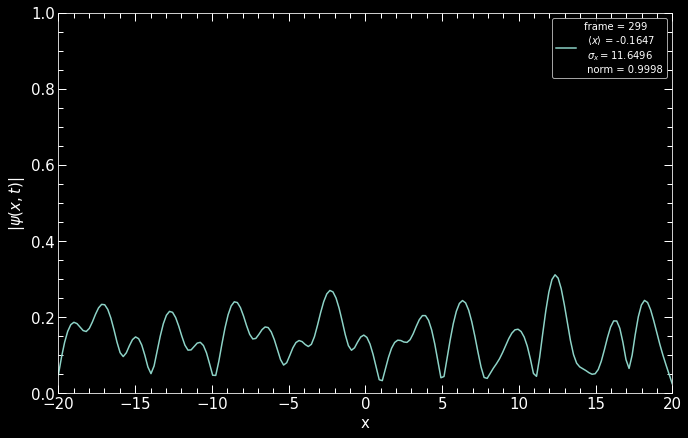

In [11]:
# Inicialização do gráfico em animação
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(11,7))
plt_data, = ax.plot([], [], label=' ')
opt_plot()
ax.set_ylim(0,1)
ax.set_xlim(-20, 20)
ax.set_xlabel("x", fontsize = 15)
ax.set_ylabel("$|\psi(x,t)|$", fontsize = 15)
T = plt.legend(loc=1)

# Função que atualiza a animação a cada frame t
def wave_plot(t):
    # Atualização dos parâmetros no gráfico
    x_mean_value = simpson(x_points*np.abs(psi2[:,t-1])**2, x_points)
    x_squared_mean_value = simpson(x_points**2*np.abs(psi2[:,t-1])**2, x_points)
    deviation = np.sqrt(x_squared_mean_value - x_mean_value**2)
    norm_factor = simpson(np.abs(psi2[:,t-1])**2, x_points)
    lab = ('frame = ' + str(t) 
            + '\n $\langle x \\rangle$ = ' + str(round(x_mean_value, 4)) 
            + "\n $\sigma _x = $" + str(round(deviation, 4)) 
            + "\n norm = " + str(round(norm_factor, 4)))
    T.get_texts()[0].set_text(lab)
    
    # Plots do gráfico da função de onda
    y_points = np.abs(psi2[:,t-1])
    plt_data.set_data(x_points, y_points)
    return plt_data,

ani = animation.FuncAnimation(fig, wave_plot, range(0, Nt), interval=1, blit=False, repeat=False)
ani.save('wave2.gif')

Novamente, colocamos o .gif resultante da animação abaixo:

![text](../Imagens/Propaga%C3%A7%C3%A3o%20temporal%20de%20uma%20fun%C3%A7%C3%A3o%20de%20onda%20(m%C3%A9todo%20de%20Crank-Nicolson)/wave2.gif)

É interessante observar como o valor esperado da posição do pacote evolui com o tempo. Inicialmente este valor aumenta, dado o momento inicial do pacote. A partir do momento que o pacote encontra a barreira de potencial infinita, este valor começa a diminuir. Ao final, como a função de onda está confinada, o valor esperado da posição do pacote se aproxima cada vez mais de zero, a medida que a evolução temporal ocorre, e fica oscilando em valores próximos a zero.

## 5. Conclusão

Os dois pacotes gaussianos simulados, com e sem momento, se alargam, conforme como é previsto que o desvio padrão $\sigma _x$ aumente a medida que o pacote é evoluído temporalmente. Além disso, foi interessante observar o comportamento dos pacotes a medida que encontram a barreira de potencial.

Dito isto, este `Notebook` termina por aqui.

## Referências

**[1]** *O método de Crank-Nicolson: <https://en.wikipedia.org/wiki/Crank–Nicolson_method>*

**[2]** *Evolução e propagação temporal da função de onda, postado no projeto PET.py em 04/11/2020, por Gabriel Wendell Celestino Rocha (ex-petiano):
<https://github.com/GabrielWendell/PET.py/blob/main/Notebooks/Evolução%20e%20propagação%20temporal%20da%20função%20de%20onda.ipynb>.*

**[3]** *Inspiração para a criação do Notebook: <http://staff.ustc.edu.cn/~zqj/posts/Numerical_TDSE/>*